## Import relevant libraries

In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt

In [3]:
import seaborn as sns

## Load the **dataset**

In [4]:
flightdelay = pd.read_csv('/content/drive/MyDrive/flights_sample_3m.csv')

In [5]:
flightdelay.head(10)

,FL_DATE,AIRLINE,AIRLINE_DOT,AIRLINE_CODE,DOT_CODE,FL_NUMBER,ORIGIN,ORIGIN_CITY,DEST,DEST_CITY,...,DIVERTED,CRS_ELAPSED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,DELAY_DUE_CARRIER,DELAY_DUE_WEATHER,DELAY_DUE_NAS,DELAY_DUE_SECURITY,DELAY_DUE_LATE_AIRCRAFT
0,2019-01-09,United Air Lines Inc.,United Air Lines Inc.: UA,UA,19977,1562,FLL,"Fort Lauderdale, FL",EWR,"Newark, NJ",...,0.0,186.0,176.0,153.0,1065.0,NaN,NaN,NaN,NaN,NaN
1,2022-11-19,Delta Air Lines Inc.,Delta Air Lines Inc.: DL,DL,19790,1149,MSP,"Minneapolis, MN",SEA,"Seattle, WA",...,0.0,235.0,236.0,189.0,1399.0,NaN,NaN,NaN,NaN,NaN
2,2022-07-22,United Air Lines Inc.,United Air Lines Inc.: UA,UA,19977,459,DEN,"Denver, CO",MSP,"Minneapolis, MN",...,0.0,118.0,112.0,87.0,680.0,NaN,NaN,NaN,NaN,NaN
3,2023-03-06,Delta Air Lines Inc.,Delta Air Lines Inc.: DL,DL,19790,2295,MSP,"Minneapolis, MN",SFO,"San Francisco, CA",...,0.0,260.0,285.0,249.0,1589.0,0.0,0.0,24.0,0.0,0.0
4,2020-02-23,Spirit Air Lines,Spirit Air Lines: NK,NK,20416,407,MCO,"Orlando, FL",DFW,"Dallas/Fort Worth, TX",...,0.0,181.0,182.0,153.0,985.0,NaN,NaN,NaN,NaN,NaN
5,2019-07-31,Southwest Airlines Co.,Southwest Airlines Co.: WN,WN,19393,665,DAL,"Dallas, TX",OKC,"Oklahoma City, OK",...,0.0,60.0,54.0,36.0,181.0,141.0,0.0,0.0,0.0,0.0
6,2023-06-11,American Airlines Inc.,American Airlines Inc.: AA,AA,19805,2134,DCA,"Washington, DC",BOS,"Boston, MA",...,0.0,109.0,89.0,58.0,399.0,NaN,NaN,NaN,NaN,NaN
7,2019-07-08,Republic Airline,Republic Airline: YX,YX,20452,4464,HSV,"Huntsville, AL",DCA,"Washington, DC",...,0.0,122.0,151.0,88.0,613.0,0.0,0.0,23.0,0.0,0.0
8,2023-02-12,Spirit Air Lines,Spirit Air Lines: NK,NK,20416,590,IAH,"Houston, TX",LAX,"Los Angeles, CA",...,0.0,227.0,219.0,200.0,1379.0,NaN,NaN,NaN,NaN,NaN
9,2020-08-22,Alaska Airlines Inc.,Alaska Airlines Inc.: AS,AS,19930,223,SEA,"Seattle, WA",FAI,"Fairbanks, AK",...,0.0,210.0,220.0,198.0,1533.0,NaN,NaN,NaN,NaN,NaN


In [6]:
flightdelay.shape

(3000000, 32)

There are 3000000 flight details.

## Exploring the data and cleaning it


In [7]:
flightdelay.columns

Index(['FL_DATE', 'AIRLINE', 'AIRLINE_DOT', 'AIRLINE_CODE', 'DOT_CODE',
       'FL_NUMBER', 'ORIGIN', 'ORIGIN_CITY', 'DEST', 'DEST_CITY',
       'CRS_DEP_TIME', 'DEP_TIME', 'DEP_DELAY', 'TAXI_OUT', 'WHEELS_OFF',
       'WHEELS_ON', 'TAXI_IN', 'CRS_ARR_TIME', 'ARR_TIME', 'ARR_DELAY',
       'CANCELLED', 'CANCELLATION_CODE', 'DIVERTED', 'CRS_ELAPSED_TIME',
       'ELAPSED_TIME', 'AIR_TIME', 'DISTANCE', 'DELAY_DUE_CARRIER',
       'DELAY_DUE_WEATHER', 'DELAY_DUE_NAS', 'DELAY_DUE_SECURITY',
       'DELAY_DUE_LATE_AIRCRAFT'],
      dtype='object')

In [8]:
flightdelay.describe()

,DOT_CODE,FL_NUMBER,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,CRS_ARR_TIME,...,DIVERTED,CRS_ELAPSED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,DELAY_DUE_CARRIER,DELAY_DUE_WEATHER,DELAY_DUE_NAS,DELAY_DUE_SECURITY,DELAY_DUE_LATE_AIRCRAFT
count,3.000000e+06,3.000000e+06,3.000000e+06,2.922385e+06,2.922356e+06,2.921194e+06,2.921194e+06,2.920056e+06,2.920056e+06,3.000000e+06,...,3.000000e+06,2.999986e+06,2.913802e+06,2.913802e+06,3.000000e+06,533863.000000,533863.000000,533863.000000,533863.000000,533863.000000
mean,1.997629e+04,2.511536e+03,1.327062e+03,1.329776e+03,1.012333e+01,1.664305e+01,1.352361e+03,1.462500e+03,7.678982e+00,1.490561e+03,...,2.352000e-03,1.422758e+02,1.366205e+02,1.123108e+02,8.093616e+02,24.759086,3.985260,13.164728,0.145931,25.471282
std,3.772846e+02,1.747258e+03,4.858789e+02,4.993101e+02,4.925183e+01,9.192901e+00,5.008727e+02,5.272368e+02,6.269639e+00,5.115476e+02,...,4.844036e-02,7.155669e+01,7.167582e+01,6.975484e+01,5.878939e+02,71.771845,32.410796,33.161122,3.582053,55.766892
min,1.939300e+04,1.000000e+00,1.000000e+00,1.000000e+00,-9.000000e+01,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,...,0.000000e+00,1.000000e+00,1.500000e+01,8.000000e+00,2.900000e+01,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.979000e+04,1.051000e+03,9.150000e+02,9.160000e+02,-6.000000e+00,1.100000e+01,9.310000e+02,1.049000e+03,4.000000e+00,1.107000e+03,...,0.000000e+00,9.000000e+01,8.400000e+01,6.100000e+01,3.770000e+02,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.993000e+04,2.152000e+03,1.320000e+03,1.323000e+03,-2.000000e+00,1.400000e+01,1.336000e+03,1.501000e+03,6.000000e+00,1.516000e+03,...,0.000000e+00,1.250000e+02,1.200000e+02,9.500000e+01,6.510000e+02,4.000000,0.000000,0.000000,0.000000,0.000000
75%,2.036800e+04,3.797000e+03,1.730000e+03,1.739000e+03,6.000000e+00,1.900000e+01,1.752000e+03,1.908000e+03,9.000000e+00,1.919000e+03,...,0.000000e+00,1.720000e+02,1.670000e+02,1.420000e+02,1.046000e+03,23.000000,0.000000,17.000000,0.000000,30.000000
max,2.045200e+04,9.562000e+03,2.359000e+03,2.400000e+03,2.966000e+03,1.840000e+02,2.400000e+03,2.400000e+03,2.490000e+02,2.400000e+03,...,1.000000e+00,7.050000e+02,7.390000e+02,6.920000e+02,5.812000e+03,2934.000000,1653.000000,1741.000000,1185.000000,2557.000000


In [9]:
flightdelay.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000000 entries, 0 to 2999999
Data columns (total 32 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   FL_DATE                  object 
 1   AIRLINE                  object 
 2   AIRLINE_DOT              object 
 3   AIRLINE_CODE             object 
 4   DOT_CODE                 int64  
 5   FL_NUMBER                int64  
 6   ORIGIN                   object 
 7   ORIGIN_CITY              object 
 8   DEST                     object 
 9   DEST_CITY                object 
 10  CRS_DEP_TIME             int64  
 11  DEP_TIME                 float64
 12  DEP_DELAY                float64
 13  TAXI_OUT                 float64
 14  WHEELS_OFF               float64
 15  WHEELS_ON                float64
 16  TAXI_IN                  float64
 17  CRS_ARR_TIME             int64  
 18  ARR_TIME                 float64
 19  ARR_DELAY                float64
 20  CANCELLED                float64
 21  CANCELLA

The Columns 'AIRLINE_DOT', 'DOT_CODE' , 'FL_NUMBER' , 'WHEELS_OFF' and 'WHEELS_ON' are not needed for the analysis. Hence we will be dropping them.

In [10]:
flightdelay.drop('AIRLINE_DOT', axis=1, inplace=True)

In [11]:
flightdelay.drop('DOT_CODE', axis=1, inplace=True)
flightdelay.drop('FL_NUMBER', axis=1, inplace=True)
flightdelay.drop('WHEELS_OFF', axis=1, inplace=True)
flightdelay.drop('WHEELS_ON', axis=1, inplace=True)



In [12]:
# Split the ORIGIN_CITY & DEST_CITY into 2
flightdelay[['ORIGIN_CITY', 'ORIGIN_STATE']] = flightdelay['ORIGIN_CITY'].str.split(', ', expand=True)
flightdelay[['DEST_CITY', 'DEST_STATE']] = flightdelay['DEST_CITY'].str.split(', ', expand=True)



In [13]:
flightdelay.head(5)

,FL_DATE,AIRLINE,AIRLINE_CODE,ORIGIN,ORIGIN_CITY,DEST,DEST_CITY,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,...,ELAPSED_TIME,AIR_TIME,DISTANCE,DELAY_DUE_CARRIER,DELAY_DUE_WEATHER,DELAY_DUE_NAS,DELAY_DUE_SECURITY,DELAY_DUE_LATE_AIRCRAFT,ORIGIN_STATE,DEST_STATE
0,2019-01-09,United Air Lines Inc.,UA,FLL,Fort Lauderdale,EWR,Newark,1155,1151.0,-4.0,...,176.0,153.0,1065.0,NaN,NaN,NaN,NaN,NaN,FL,NJ
1,2022-11-19,Delta Air Lines Inc.,DL,MSP,Minneapolis,SEA,Seattle,2120,2114.0,-6.0,...,236.0,189.0,1399.0,NaN,NaN,NaN,NaN,NaN,MN,WA
2,2022-07-22,United Air Lines Inc.,UA,DEN,Denver,MSP,Minneapolis,954,1000.0,6.0,...,112.0,87.0,680.0,NaN,NaN,NaN,NaN,NaN,CO,MN
3,2023-03-06,Delta Air Lines Inc.,DL,MSP,Minneapolis,SFO,San Francisco,1609,1608.0,-1.0,...,285.0,249.0,1589.0,0.0,0.0,24.0,0.0,0.0,MN,CA
4,2020-02-23,Spirit Air Lines,NK,MCO,Orlando,DFW,Dallas/Fort Worth,1840,1838.0,-2.0,...,182.0,153.0,985.0,NaN,NaN,NaN,NaN,NaN,FL,TX


#### Cytoscape Data


In [14]:
Flight_route = flightdelay.groupby(['ORIGIN_STATE', 'DEST_STATE']).size().reset_index(name = 'weight')
Flight_route.head()

,ORIGIN_STATE,DEST_STATE,weight
0,AK,AK,10112
1,AK,AZ,123
2,AK,CA,210
3,AK,CO,235
4,AK,GA,45


In [15]:
cancelled_flightstotal = flightdelay.groupby(['ORIGIN_STATE','DEST_STATE'])['CANCELLED'].sum().reset_index (name = 'CANCELLEDTOTAL')
cancelled_flightstotal.head()

,ORIGIN_STATE,DEST_STATE,CANCELLEDTOTAL
0,AK,AK,280.0
1,AK,AZ,0.0
2,AK,CA,2.0
3,AK,CO,2.0
4,AK,GA,0.0


In [16]:
Flight_route = pd.merge(Flight_route, cancelled_flightstotal, on=['ORIGIN_STATE', 'DEST_STATE'], how='left')
Flight_route.head()

,ORIGIN_STATE,DEST_STATE,weight,CANCELLEDTOTAL
0,AK,AK,10112,280.0
1,AK,AZ,123,0.0
2,AK,CA,210,2.0
3,AK,CO,235,2.0
4,AK,GA,45,0.0


In [17]:
Flight_route.to_csv('Flight_route.csv', index = False)

In [18]:
# Seeing how many null values there are
flightdelay.isnull().sum()

,0
FL_DATE,0
AIRLINE,0
AIRLINE_CODE,0
ORIGIN,0
ORIGIN_CITY,0
DEST,0
DEST_CITY,0
CRS_DEP_TIME,0
DEP_TIME,77615
DEP_DELAY,77644


In [19]:
unique_values_airline = flightdelay['AIRLINE'].unique()

In [20]:
unique_values_airline

array(['United Air Lines Inc.', 'Delta Air Lines Inc.',
       'Spirit Air Lines', 'Southwest Airlines Co.',
       'American Airlines Inc.', 'Republic Airline',
       'Alaska Airlines Inc.', 'JetBlue Airways', 'PSA Airlines Inc.',
       'Allegiant Air', 'ExpressJet Airlines LLC d/b/a aha!',
       'SkyWest Airlines Inc.', 'Endeavor Air Inc.', 'Envoy Air',
       'Frontier Airlines Inc.', 'Mesa Airlines Inc.', 'Horizon Air',
       'Hawaiian Airlines Inc.'], dtype=object)

The 'ExpressJet Airlines LLC d/b/a aha!' has some error in the name.

In [21]:
flightdelay['AIRLINE'] = flightdelay['AIRLINE'].replace('ExpressJet Airlines LLC d/b/a aha!', 'ExpressJet Airlines LLC')
print("\nAfter fixing specific typos:")
print(flightdelay['AIRLINE'].unique())


After fixing specific typos:
['United Air Lines Inc.' 'Delta Air Lines Inc.' 'Spirit Air Lines'
 'Southwest Airlines Co.' 'American Airlines Inc.' 'Republic Airline'
 'Alaska Airlines Inc.' 'JetBlue Airways' 'PSA Airlines Inc.'
 'Allegiant Air' 'ExpressJet Airlines LLC' 'SkyWest Airlines Inc.'
 'Endeavor Air Inc.' 'Envoy Air' 'Frontier Airlines Inc.'
 'Mesa Airlines Inc.' 'Horizon Air' 'Hawaiian Airlines Inc.']


In [22]:
unique_values_airline = flightdelay['AIRLINE'].unique()
unique_values_airline

array(['United Air Lines Inc.', 'Delta Air Lines Inc.',
       'Spirit Air Lines', 'Southwest Airlines Co.',
       'American Airlines Inc.', 'Republic Airline',
       'Alaska Airlines Inc.', 'JetBlue Airways', 'PSA Airlines Inc.',
       'Allegiant Air', 'ExpressJet Airlines LLC',
       'SkyWest Airlines Inc.', 'Endeavor Air Inc.', 'Envoy Air',
       'Frontier Airlines Inc.', 'Mesa Airlines Inc.', 'Horizon Air',
       'Hawaiian Airlines Inc.'], dtype=object)

Successfully corrected the error

Only 'CANCELLATION_CODE' has null values. We need to clean it first.

---



In [23]:
#Let first check if all the cancelled flights have cancellation codes
# Count total canceled flights
total_canceled_flights = flightdelay[flightdelay["CANCELLED"] == 1].shape[0]

# Count total non-null cancellation codes
total_cancellation_codes = flightdelay["CANCELLATION_CODE"].notna().sum()

# Print results
print(f"Total Canceled Flights: {total_canceled_flights}")
print(f"Total Flights with Cancellation Code: {total_cancellation_codes}")

# Check if they match
if total_canceled_flights == total_cancellation_codes:
    print("✅ The number of cancellation codes matches the number of canceled flights.")
else:
    print("⚠️ There is a mismatch! Some canceled flights may be missing a cancellation code.")

Total Canceled Flights: 79140
Total Flights with Cancellation Code: 79140
✅ The number of cancellation codes matches the number of canceled flights.


In [24]:
#Lets bring out the year from the FL_DATE column
flightdelay['YEAR'] = pd.to_datetime(flightdelay['FL_DATE']).dt.year

print("\nDataFrame with a New 'year' Column:")
print(flightdelay)


DataFrame with a New 'year' Column:
            FL_DATE                 AIRLINE AIRLINE_CODE ORIGIN  \
0        2019-01-09   United Air Lines Inc.           UA    FLL   
1        2022-11-19    Delta Air Lines Inc.           DL    MSP   
2        2022-07-22   United Air Lines Inc.           UA    DEN   
3        2023-03-06    Delta Air Lines Inc.           DL    MSP   
4        2020-02-23        Spirit Air Lines           NK    MCO   
...             ...                     ...          ...    ...   
2999995  2022-11-13  American Airlines Inc.           AA    JAX   
2999996  2022-11-02  American Airlines Inc.           AA    ORD   
2999997  2022-09-11    Delta Air Lines Inc.           DL    HSV   
2999998  2019-11-13        Republic Airline           YX    BOS   
2999999  2019-06-15  Southwest Airlines Co.           WN    LGB   

             ORIGIN_CITY DEST          DEST_CITY  CRS_DEP_TIME  DEP_TIME  \
0        Fort Lauderdale  EWR             Newark          1155    1151.0   
1     

## **Question 1**

### Which time of the day has more departure delays per airline?


In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

In [26]:
flightdelay['DEP_HOUR'] = flightdelay['CRS_DEP_TIME'] // 100

In [27]:
def get_time_of_day(hour):
    if 5 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 17:
        return 'Afternoon'
    else:
        return 'Night'

flightdelay['TimeOfDay'] = flightdelay['DEP_HOUR'].apply(get_time_of_day)

In [49]:
filtered_flightdelay = flightdelay[(flightdelay['CANCELLED'] == 0) & (flightdelay['DIVERTED'] == 0) & (flightdelay['DEP_DELAY'].notna())]
selected_airlines = ["Southwest Airlines Co.", "Delta Air Lines Inc.",
                     "American Airlines Inc.", "SkyWest Airlines Inc.", "United Air Lines Inc."]

filtered_flight_delay = filtered_flightdelay[filtered_flightdelay['AIRLINE'].isin(selected_airlines)]
filtered_flightdelay_dep = filtered_flight_delay[(filtered_flight_delay['DEP_DELAY'] >= 0) & (filtered_flight_delay['DEP_DELAY'] <= 180)]

/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be remo

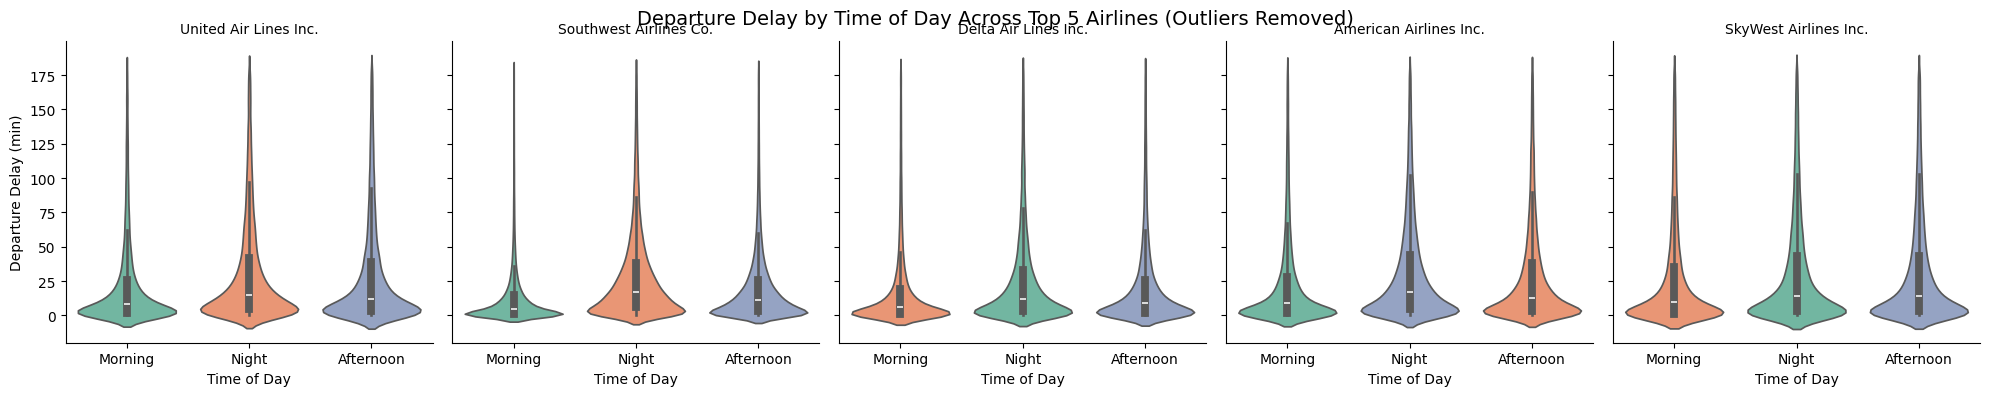

In [50]:
g = sns.FacetGrid(filtered_flightdelay_dep, col='AIRLINE', col_wrap=5, height=4, sharey=True)
g.map_dataframe(sns.violinplot, x='TimeOfDay', y='DEP_DELAY', palette='Set2', inner='box')
g.set_titles(col_template="{col_name}")
g.set_axis_labels("Time of Day", "Departure Delay (min)")
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle('Departure Delay by Time of Day Across Top 5 Airlines (Outliers Removed)', fontsize=14)

plt.show()

<ipython-input-44-0f08902e5584>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=filtered_flightdelay, x='TimeOfDay', y='DEP_DELAY', palette='Set2')


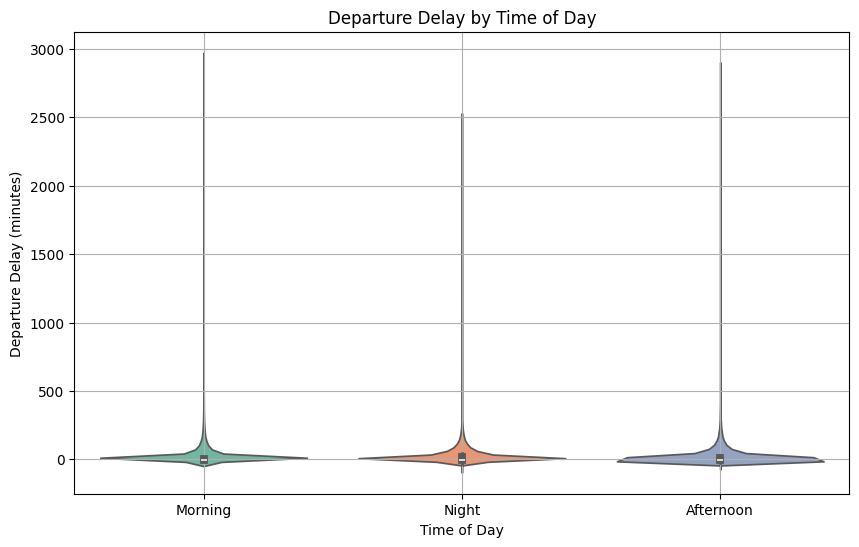

In [44]:
plt.figure(figsize=(10, 6))
sns.violinplot(data=filtered_flightdelay, x='TimeOfDay', y='DEP_DELAY', palette='Set2')
plt.title('Departure Delay by Time of Day')
plt.xlabel('Time of Day')
plt.ylabel('Departure Delay (minutes)')
plt.grid(True)
plt.show()

###QNS : what is the trend of average departure delay by origin state over the months, across years?

<ipython-input-31-2f6093636188>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  delay_summary.rename(columns={'DEP_DELAY': 'AVG_DEP_DELAY'}, inplace=True)


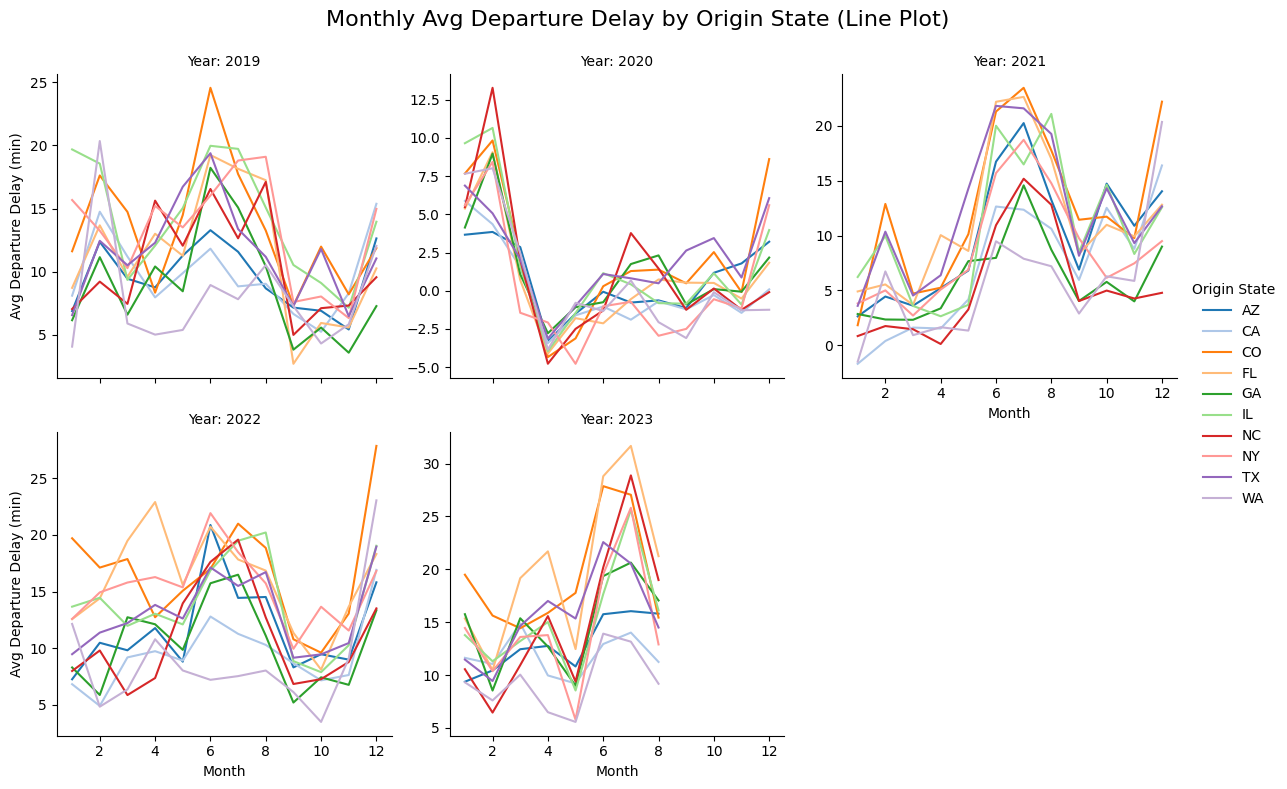

In [31]:
# Convert date
flightdelay['FL_DATE'] = pd.to_datetime(flightdelay['FL_DATE'], errors='coerce')

# Extract year and month
flightdelay['YEAR'] = flightdelay['FL_DATE'].dt.year
flightdelay['MONTH'] = flightdelay['FL_DATE'].dt.month

# Filter out cancelled, diverted, and null dep_delay
filtered_flightdelay = flightdelay[
    (flightdelay['CANCELLED'] == 0) &
    (flightdelay['DIVERTED'] == 0) &
    (flightdelay['DEP_DELAY'].notna()) &
    (flightdelay['ORIGIN_STATE'].notna())
]

# Group by year, month, and origin state
delay_summary = filtered_flightdelay.groupby(['YEAR', 'MONTH', 'ORIGIN_STATE'], as_index=False)['DEP_DELAY'].mean()
top_states = (
    filtered_flightdelay['ORIGIN_STATE'].value_counts().nlargest(10).index
)
delay_summary = delay_summary[delay_summary['ORIGIN_STATE'].isin(top_states)]
delay_summary.rename(columns={'DEP_DELAY': 'AVG_DEP_DELAY'}, inplace=True)

# Plot with seaborn lineplot and FacetGrid
g = sns.FacetGrid(delay_summary, col='YEAR', col_wrap=3, height=4, sharey=False)
g.map_dataframe(sns.lineplot, x='MONTH', y='AVG_DEP_DELAY', hue='ORIGIN_STATE', palette='tab20')
g.set_axis_labels("Month", "Avg Departure Delay (min)")
g.set_titles("Year: {col_name}")
g.add_legend(title="Origin State")
plt.subplots_adjust(top=0.9)
g.fig.suptitle("Monthly Avg Departure Delay by Origin State (Line Plot)", fontsize=16)
plt.show()

### QNS: percentage of On-Time flights per airline per year


<ipython-input-52-d05433621212>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  flighton_time['ON_TIME'] = flighton_time['DEP_DELAY'] <= 0


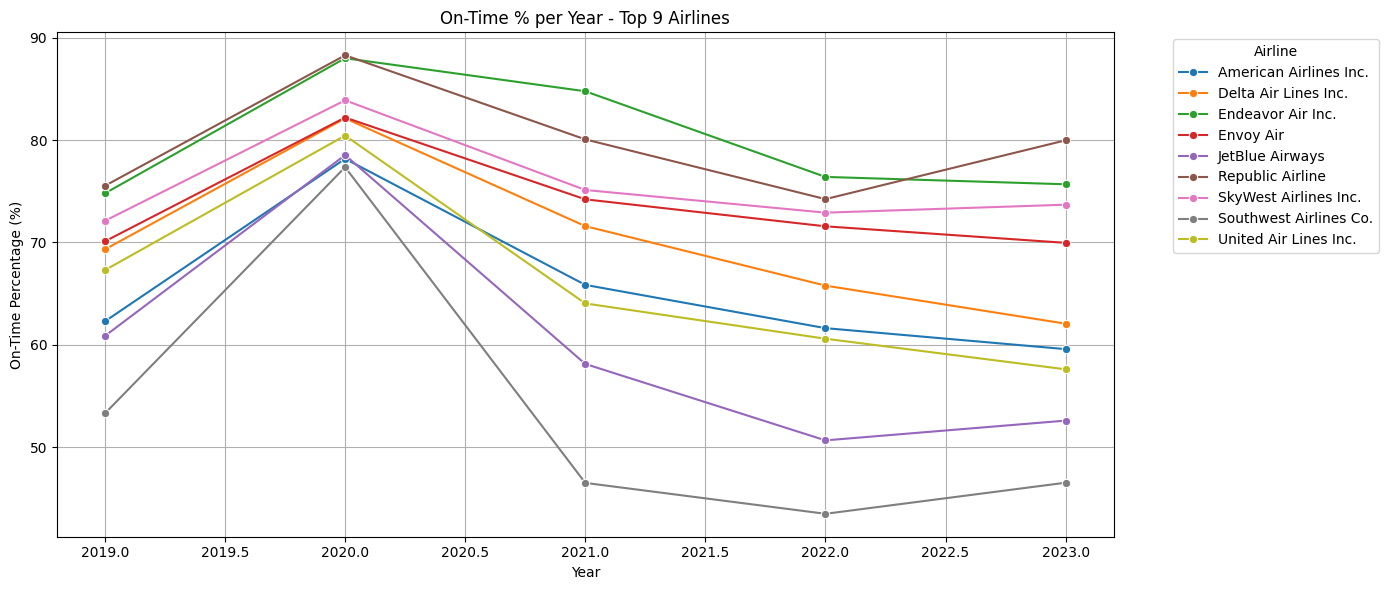

In [52]:
flighton_time = flightdelay[flightdelay['CANCELLED'] == 0]

# Define on-time (e.g., dep delay <= 0)
flighton_time['ON_TIME'] = flighton_time['DEP_DELAY'] <= 0

airline_counts = flighton_time['AIRLINE'].value_counts()
top_9 = airline_counts.head(9).index.tolist()
bottom_9 = airline_counts.tail(9).index.tolist()

# Subset datasets
airline_top = flighton_time[flighton_time['AIRLINE'].isin(top_9)]
airline_bottom = flighton_time[flighton_time['AIRLINE'].isin(bottom_9)]

# Calculate on-time percentage
def calculate_on_time_percentage(flighton_time):
    return (
        flighton_time.groupby(['YEAR', 'AIRLINE'])['ON_TIME']
        .mean()
        .reset_index()
        .assign(ON_TIME=lambda d: d['ON_TIME'] * 100)
    )

top_pct = calculate_on_time_percentage(airline_top)
bottom_pct = calculate_on_time_percentage(airline_bottom)

# Plot Top 9 Airlines
plt.figure(figsize=(14, 6))
sns.lineplot(data=top_pct, x='YEAR', y='ON_TIME', hue='AIRLINE', marker='o')
plt.title("On-Time % per Year - Top 9 Airlines")
plt.ylabel("On-Time Percentage (%)")
plt.xlabel("Year")
plt.grid(True)
plt.legend(title="Airline", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()



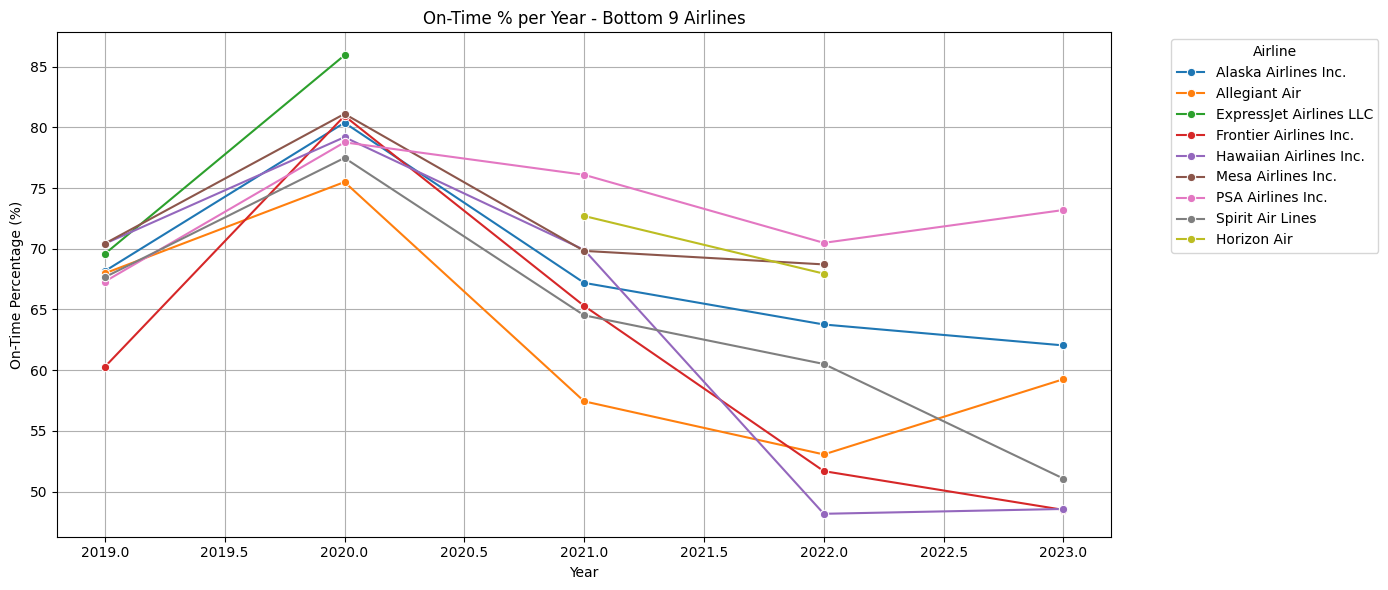

In [54]:
# Plot Bottom 9 Airlines
plt.figure(figsize=(14, 6))
sns.lineplot(data=bottom_pct, x='YEAR', y='ON_TIME', hue='AIRLINE', marker='o')
plt.title("On-Time % per Year - Bottom 9 Airlines")
plt.ylabel("On-Time Percentage (%)")
plt.xlabel("Year")
plt.grid(True)
plt.legend(title="Airline", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

### QNS: If a flight get delayed, how likely are they to be cancelled?

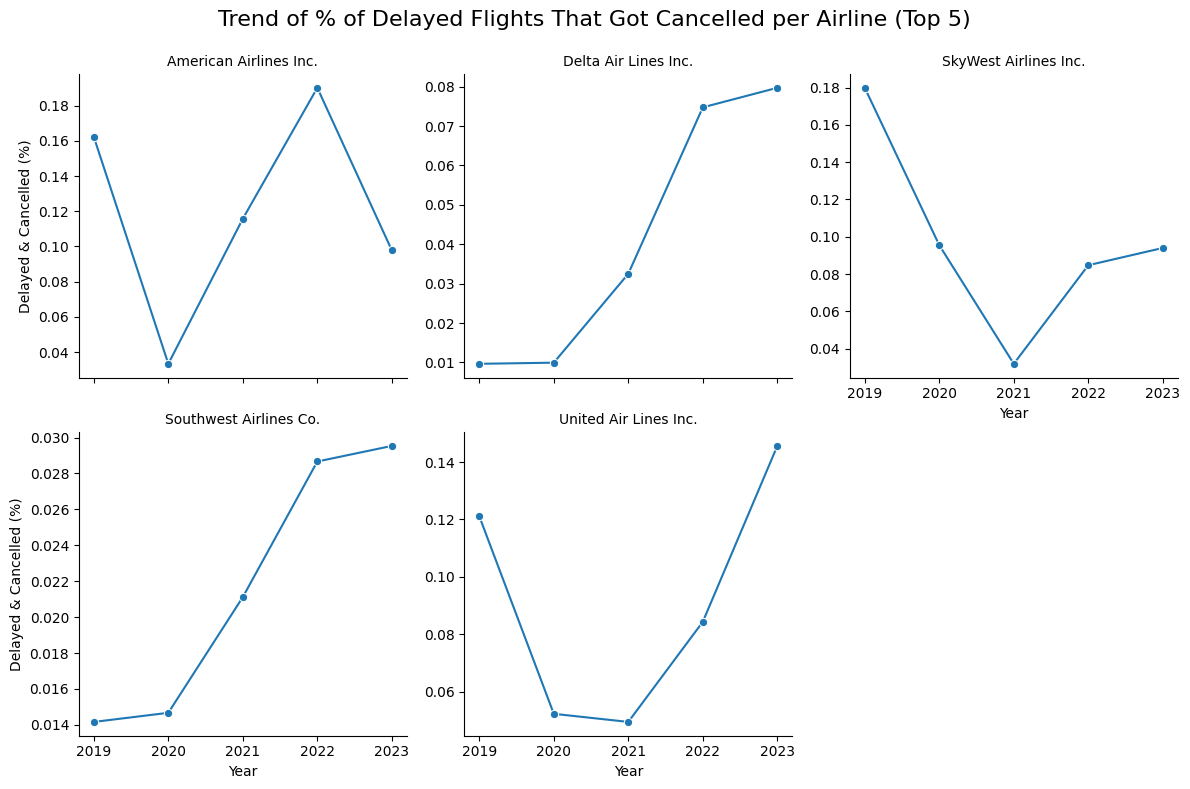

In [56]:

#Filter flights where dep_delay > 0
delayed_flights = flightdelay[(flightdelay['DEP_DELAY'] > 0)]

filtered_flight_delay = delayed_flights[delayed_flights['AIRLINE'].isin(selected_airlines)]
# Group and calculate total delayed flights and delayed+cancelled flights
summary = filtered_flight_delay.groupby(['AIRLINE', 'YEAR']).agg(
    Total_Delayed=('DEP_DELAY', 'count'),
    Delayed_and_Cancelled=('CANCELLED', lambda x: (x == 1).sum())
).reset_index()

#Calculate the percentage
summary['Percentage_Delayed_and_Cancelled'] = (summary['Delayed_and_Cancelled'] / summary['Total_Delayed']) * 100

#Plot
g = sns.FacetGrid(summary, col="AIRLINE", col_wrap=3, height=4, sharey=False)
g.map_dataframe(sns.lineplot, x="YEAR", y="Percentage_Delayed_and_Cancelled", marker="o")

g.set_axis_labels("Year", "Delayed & Cancelled (%)")
g.set_titles("{col_name}")
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle("Trend of % of Delayed Flights That Got Cancelled per Airline (Top 5)", fontsize=16)

plt.show()


### QNS: Avg arr delay for short haul vs long haul flight per airline

<ipython-input-57-3f8354f206e9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_flightdelay['FLIGHT_TYPE'] = filtered_flightdelay['DISTANCE'].apply(lambda x: 'Short Haul' if x < 700 else 'Medium Haul')


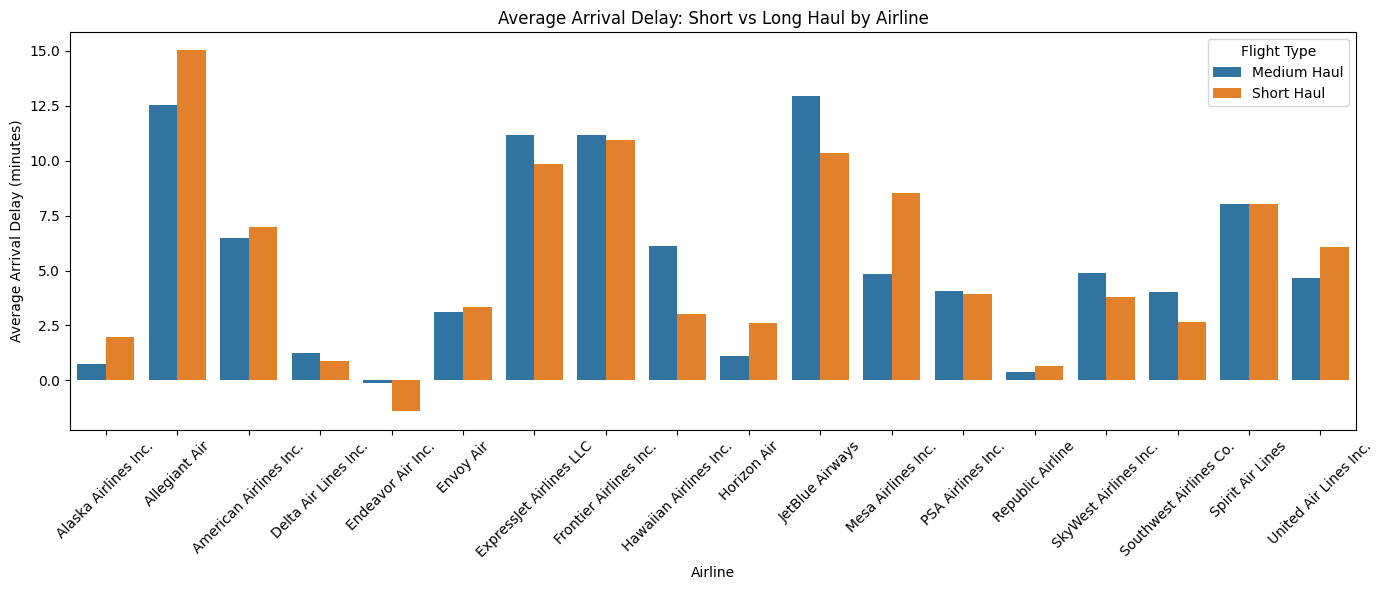

In [57]:
filtered_flightdelay['FLIGHT_TYPE'] = filtered_flightdelay['DISTANCE'].apply(lambda x: 'Short Haul' if x < 700 else 'Medium Haul')

# Group by airline and flight type, calculate average arrival delay
avg_delay = filtered_flightdelay.groupby(['AIRLINE', 'FLIGHT_TYPE'])['ARR_DELAY'].mean().reset_index()

# Plot grouped bar chart
plt.figure(figsize=(14, 6))
sns.barplot(data=avg_delay, x='AIRLINE', y='ARR_DELAY', hue='FLIGHT_TYPE')
plt.title('Average Arrival Delay: Short vs Long Haul by Airline')
plt.xlabel('Airline')
plt.ylabel('Average Arrival Delay (minutes)')
plt.legend(title='Flight Type')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [38]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
